# Familiar: A Study In Data Analysis

Welcome to _Familiar_, a startup in the new market of blood transfusion! You’ve joined the team because you appreciate the flexible hours and extremely intelligent team, but the overeager doorman welcoming you into the office is a nice way to start your workday (well, work-evening).

Familiar has fallen into some tough times lately, so you are hoping to help them make some insights about their product and help move the needle (so to speak).

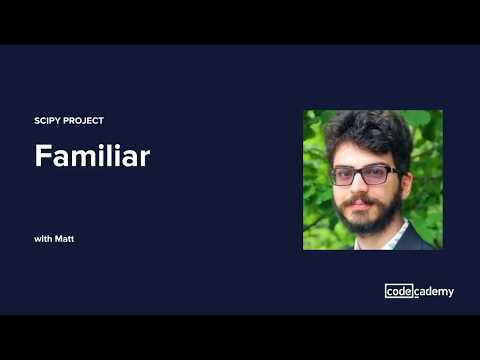

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('fu65555F2yc', width = 800, height = 500)

## What Can Familiar Do For You?

1. We are going to start by including a data interface that a previous software engineer wrote for you, it is aptly titled familiar, so just import that.

In [2]:
import familiar

2. Perfect, now the first thing we want to show is that our most basic package, the Vein Pack, actually has a significant impact on the subscribers. It would be a marketing goldmine if we can show that subscribers to the Vein Pack live longer than other people.

    Lifespans of Vein Pack users are returned by the function `lifespans(package='vein')`, which is part of the `familiar` module. Call that function and save the data into a variable called `vein_pack_lifespans`.

In [3]:
vein_pack_lifespans = familiar.lifespans(package='vein')
vein_pack_lifespans

[76.93767431371617,
 75.99335913014681,
 74.79815012354048,
 74.50202147158551,
 77.48888897587436,
 72.14256573154043,
 75.99303167191182,
 76.34155048095228,
 77.48475562999882,
 76.5321014800867,
 76.25508955276418,
 77.58398316566651,
 77.04737034962294,
 72.87475174594711,
 77.43504547002844,
 77.4923414107892,
 78.32672046879952,
 73.34370246887067,
 79.96915765236346,
 74.83800583300325]

3. We would like to find out if the average lifespan of a Vein Pack subscriber is _significantly different_ from the average life expectancy of $71$ years.

    Import the statistical test we would use to determine if a sample comes from a population that has a given mean from `scipy.stats`.

In [4]:
from scipy.stats import ttest_1samp

4. Now use the 1-Sample T-Test to compare `vein_pack_lifespans` to the average life expectancy $71$. Save the result into a variable called `vein_pack_test`.

In [5]:
average_life_expectancy = 71

vein_pack_test = ttest_1samp(vein_pack_lifespans, average_life_expectancy)

5. Let us check if the results are significant! Check the pvalue of `vein_pack_test`. If it is less than $0.05$, we have got significance!

In [6]:
vein_pack_test.pvalue

2.7463117986584107e-10

In [7]:
significance_threshold = 0.05

6. We want to present this information to the CEO, Vlad, of this incredible finding. Let us print some information out! If the test's p-value is **less** than $0.05$, print `"The Vein Pack Is Proven To Make You Live Longer!"`. Otherwise print `"The Vein Pack Is Probably Good For You Somehow!"`

In [8]:
if vein_pack_test.pvalue < significance_threshold:
    print("The Vein Pack Is Proven To Make You Live Longer!")
else:
    print("The Vein Pack Is Probably Good For You Somehow!")

The Vein Pack Is Proven To Make You Live Longer!


## Upselling Familiar: Pumping Life Into The Company

7. In order to differentiate Familiar's different product lines, we would like to compare this lifespan data between our different packages. Our next step up from the Vein Pack is the Artery Pack. Let us get the lifespans of Artery Pack subscribers using the same method, called with `package='artery'` instead. Save the value into a variable called `artery_pack_lifespans`.

In [9]:
artery_pack_lifespans = familiar.lifespans(package='artery')
artery_pack_lifespans

[76.33537008426835,
 76.92308231559062,
 75.9524416448778,
 74.5449834807203,
 76.4045042754472,
 73.07924888636576,
 77.02354461052992,
 74.1174204200688,
 77.38650656208344,
 73.04476583718993,
 74.96311850866167,
 73.31954301933486,
 75.85740137696862,
 76.15265351351255,
 73.3551028632267,
 73.90221256458788,
 73.77121195092475,
 68.31489830285578,
 74.63975717775328,
 78.38547730843979]

8. Now we want to show that the subscribers to the Artery Pack experience a significant improvement even beyond what a Vein Pack subscriber's benefits. Import the 2-Sample T-Test and we will use that to see if there is a significant difference between the two subscriptions.

In [10]:
from scipy.stats import ttest_ind

9. Okay let us run the 2-Sample test! Save the results into a variable named `package_comparison_results`.

In [11]:
package_comparison_results = ttest_ind(vein_pack_lifespans, artery_pack_lifespans)

10. Let us see the results! If the p-value from our experiment is less than $0.05$, the results are significant and we should print out `"The Artery Package guarantees even stronger results!"`. Otherwise we should print out `"The Artery Package is also a great product!"`

In [12]:
if package_comparison_results.pvalue < significance_threshold:
    print("The Artery Package guarantees even stronger results!")
else:
    print("The Artery Package is also a great product!")

The Artery Package is also a great product!


11. Well, shame that it is not significantly better, but maybe there is a way to demonstrate the benefits of the Artery Package yet.

## Benefitting Everyone: A Familiar Problem

12. If your lifespan is not significantly increased by signing up for the Artery Package, maybe we can make some other claim about the benefits of the package. To that end, we have sent out a survey collecting the iron counts for our subscribers, and filtered that data into "low", "normal", and "high".

    We received $200$ responses from our Vein Package subscribers. $70\%$ of them had low iron counts, $20\%$ had normal, and $10\%$ of them have high iron counts.

    We were only able to get $145$ responses from our Artery Package subscribers, but only $20\%$ of them had low iron counts. $60\%$ had normal, and $20\%$ have high iron counts.

| |Vein|Artery|
|-|:---|:-----|
|low|140|29|
|normal|40|87|
|high|20|29|

13. The data from the survey has been collected and formatted into a contingency table. You can access that data from the function `familiar.iron_counts_for_package()`. Save the survey results into a variable called `iron_contingency_table`.

In [13]:
iron_contingency_table = familiar.iron_counts_for_package()

for item in iron_contingency_table:
    print(item)

[140, 29]
[40, 87]
[20, 29]


14. We want to be able to tell if what seems like a higher number of our Artery Package subscribers is a significant difference from what was reported by Vein Package subscribers. Import the Chi-Squared test so that we can find out.

In [14]:
from scipy.stats import chi2_contingency

15. Run the Chi-Squared test on the `iron_contingency_table` and save the p-value in a variable called `iron_pvalue`. Remember that this test returns four things: the test statistic, the p-value, the number of degrees of freedom, and the expected frequencies.

In [15]:
_, iron_pvalue, _, _ = chi2_contingency(iron_contingency_table)

16. Here is the big moment: if the `iron_pvalue` is less than $0.05$, print out `"The Artery Package Is Proven To Make You Healthier!"` otherwise we will have to use our other marketing copy: `"While We Cannot Say The Artery Package Will Help You, I Bet It is Nice!"`

In [16]:
if iron_pvalue < significance_threshold:
    print("The Artery Package Is Proven To Make You Healthier!")
else:
    print("While We Cannot Say The Artery Package Will Help You, I Bet It is Nice!")

The Artery Package Is Proven To Make You Healthier!


17. Fantastic! With proven benefits to both of our product lines, we can definitely ramp up our marketing and sales. Look out for a `Familiar` face in drug stores everywhere.